In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [379]:
data = pd.read_csv("COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_Facility.csv").head(30000).sort_values(['state'])

C:\Users\derek\AppData\Local\Temp\ipykernel_16568\867712236.py:1: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_Facility.csv").head(30000).sort_values(['state'])


In [380]:
data.head()

,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,fips_code,...,previous_day_admission_pediatric_covid_confirmed_unknown_7_day_sum,staffed_icu_pediatric_patients_confirmed_covid_7_day_avg,staffed_icu_pediatric_patients_confirmed_covid_7_day_coverage,staffed_icu_pediatric_patients_confirmed_covid_7_day_sum,staffed_pediatric_icu_bed_occupancy_7_day_avg,staffed_pediatric_icu_bed_occupancy_7_day_coverage,staffed_pediatric_icu_bed_occupancy_7_day_sum,total_staffed_pediatric_icu_beds_7_day_avg,total_staffed_pediatric_icu_beds_7_day_coverage,total_staffed_pediatric_icu_beds_7_day_sum
15184,021313,2022/10/07,AK,021313,SOUTH PENINSULA HOSPITAL,4300 BARTLETT ST,HOMER,99603.0,Critical Access Hospitals,2120.0,...,0.0,0.0,7,0.0,0.0,7,0.0,0.0,7,0.0
7327,020001,2020/03/27,AK,020001,PROVIDENCE ALASKA MEDICAL CENTER,3200 PROVIDENCE DRIVE,ANCHORAGE,99508.0,Short Term,2020.0,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
11806,021313,2022/02/11,AK,021313,SOUTH PENINSULA HOSPITAL,4300 BARTLETT ST,HOMER,99603.0,Critical Access Hospitals,2120.0,...,0.0,0.0,7,0.0,0.0,7,0.0,0.0,7,0.0
18367,020008,2022/07/29,AK,020008,BARTLETT REGIONAL HOSPITAL,3260 HOSPITAL DR,JUNEAU,99801.0,Short Term,2110.0,...,0.0,0.0,7,0.0,-999999.0,7,-999999.0,0.0,7,0.0
15693,020008,2022/03/25,AK,020008,BARTLETT REGIONAL HOSPITAL,3260 HOSPITAL DR,JUNEAU,99801.0,Short Term,2110.0,...,0.0,0.0,7,0.0,0.0,7,0.0,0.0,7,0.0


In [381]:
data['collection_week'].sort_values().dropna()

2328     2019/12/27
21983    2019/12/27
4116     2019/12/27
8936     2020/01/03
15744    2020/01/10
            ...    
26509    2023/02/10
26519    2023/02/10
26299    2023/02/10
11599    2023/02/10
22242    2023/02/10
Name: collection_week, Length: 30000, dtype: object

## Data Processing for State

In [382]:
def ifZero(x):
    if x < 0:
        return 0
    return x

In [403]:
# 'icu_beds_used_7_day_sum',
# 'all_pediatric_inpatient_beds_7_day_sum'

sliced = data[['inpatient_beds_used_covid_7_day_sum', 

                'all_adult_hospital_inpatient_beds_7_day_sum',
                'total_beds_7_day_sum', 
                'inpatient_beds_used_7_day_sum', 'inpatient_beds_7_day_sum', 
                
                'previous_day_admission_adult_covid_confirmed_7_day_sum',
                'previous_day_admission_adult_covid_suspected_7_day_sum']]
sliced

,inpatient_beds_used_covid_7_day_sum,all_adult_hospital_inpatient_beds_7_day_sum,total_beds_7_day_sum,inpatient_beds_used_7_day_sum,inpatient_beds_7_day_sum,previous_day_admission_adult_covid_confirmed_7_day_sum,previous_day_admission_adult_covid_suspected_7_day_sum,icu_beds_used_7_day_sum,all_pediatric_inpatient_beds_7_day_sum
15184,-999999.0,154.0,NaN,81.0,154.0,0.0,0.0,0.0,0.0
7327,NaN,NaN,490.0,231.0,401.0,NaN,NaN,NaN,NaN
11806,8.0,154.0,NaN,69.0,154.0,-999999.0,0.0,0.0,0.0
18367,16.0,371.0,NaN,283.0,399.0,8.0,0.0,30.0,28.0
15693,14.0,375.0,NaN,258.0,399.0,0.0,0.0,22.0,23.0
...,...,...,...,...,...,...,...,...,...
6273,0.0,NaN,84.0,36.0,84.0,NaN,NaN,NaN,NaN
3281,-999999.0,NaN,84.0,23.0,84.0,NaN,NaN,NaN,NaN
1928,0.0,NaN,25.0,-999999.0,-999999.0,NaN,NaN,NaN,NaN
4317,6.0,NaN,300.0,34.0,285.0,NaN,NaN,NaN,NaN


In [404]:
psliced = sliced.dropna()
psliced= psliced.applymap(lambda x: ifZero(x))
psliced

,inpatient_beds_used_covid_7_day_sum,all_adult_hospital_inpatient_beds_7_day_sum,total_beds_7_day_sum,inpatient_beds_used_7_day_sum,inpatient_beds_7_day_sum,previous_day_admission_adult_covid_confirmed_7_day_sum,previous_day_admission_adult_covid_suspected_7_day_sum,icu_beds_used_7_day_sum,all_pediatric_inpatient_beds_7_day_sum
10956,247.0,1668.0,2116.0,1909.0,2114.0,26.0,0.0,439.0,446.0
9647,52.0,483.0,707.0,352.0,567.0,13.0,4.0,62.0,84.0
16989,25.0,1043.0,1288.0,481.0,1120.0,7.0,0.0,46.0,77.0
2209,0.0,84.0,84.0,21.0,84.0,0.0,0.0,0.0,0.0
17242,0.0,84.0,84.0,26.0,84.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
29997,20.0,175.0,210.0,58.0,175.0,5.0,0.0,0.0,0.0
29636,10.0,154.0,378.0,63.0,378.0,10.0,0.0,7.0,224.0
8134,0.0,14.0,140.0,14.0,140.0,0.0,0.0,0.0,126.0
29348,7.0,112.0,126.0,25.0,112.0,0.0,0.0,0.0,0.0


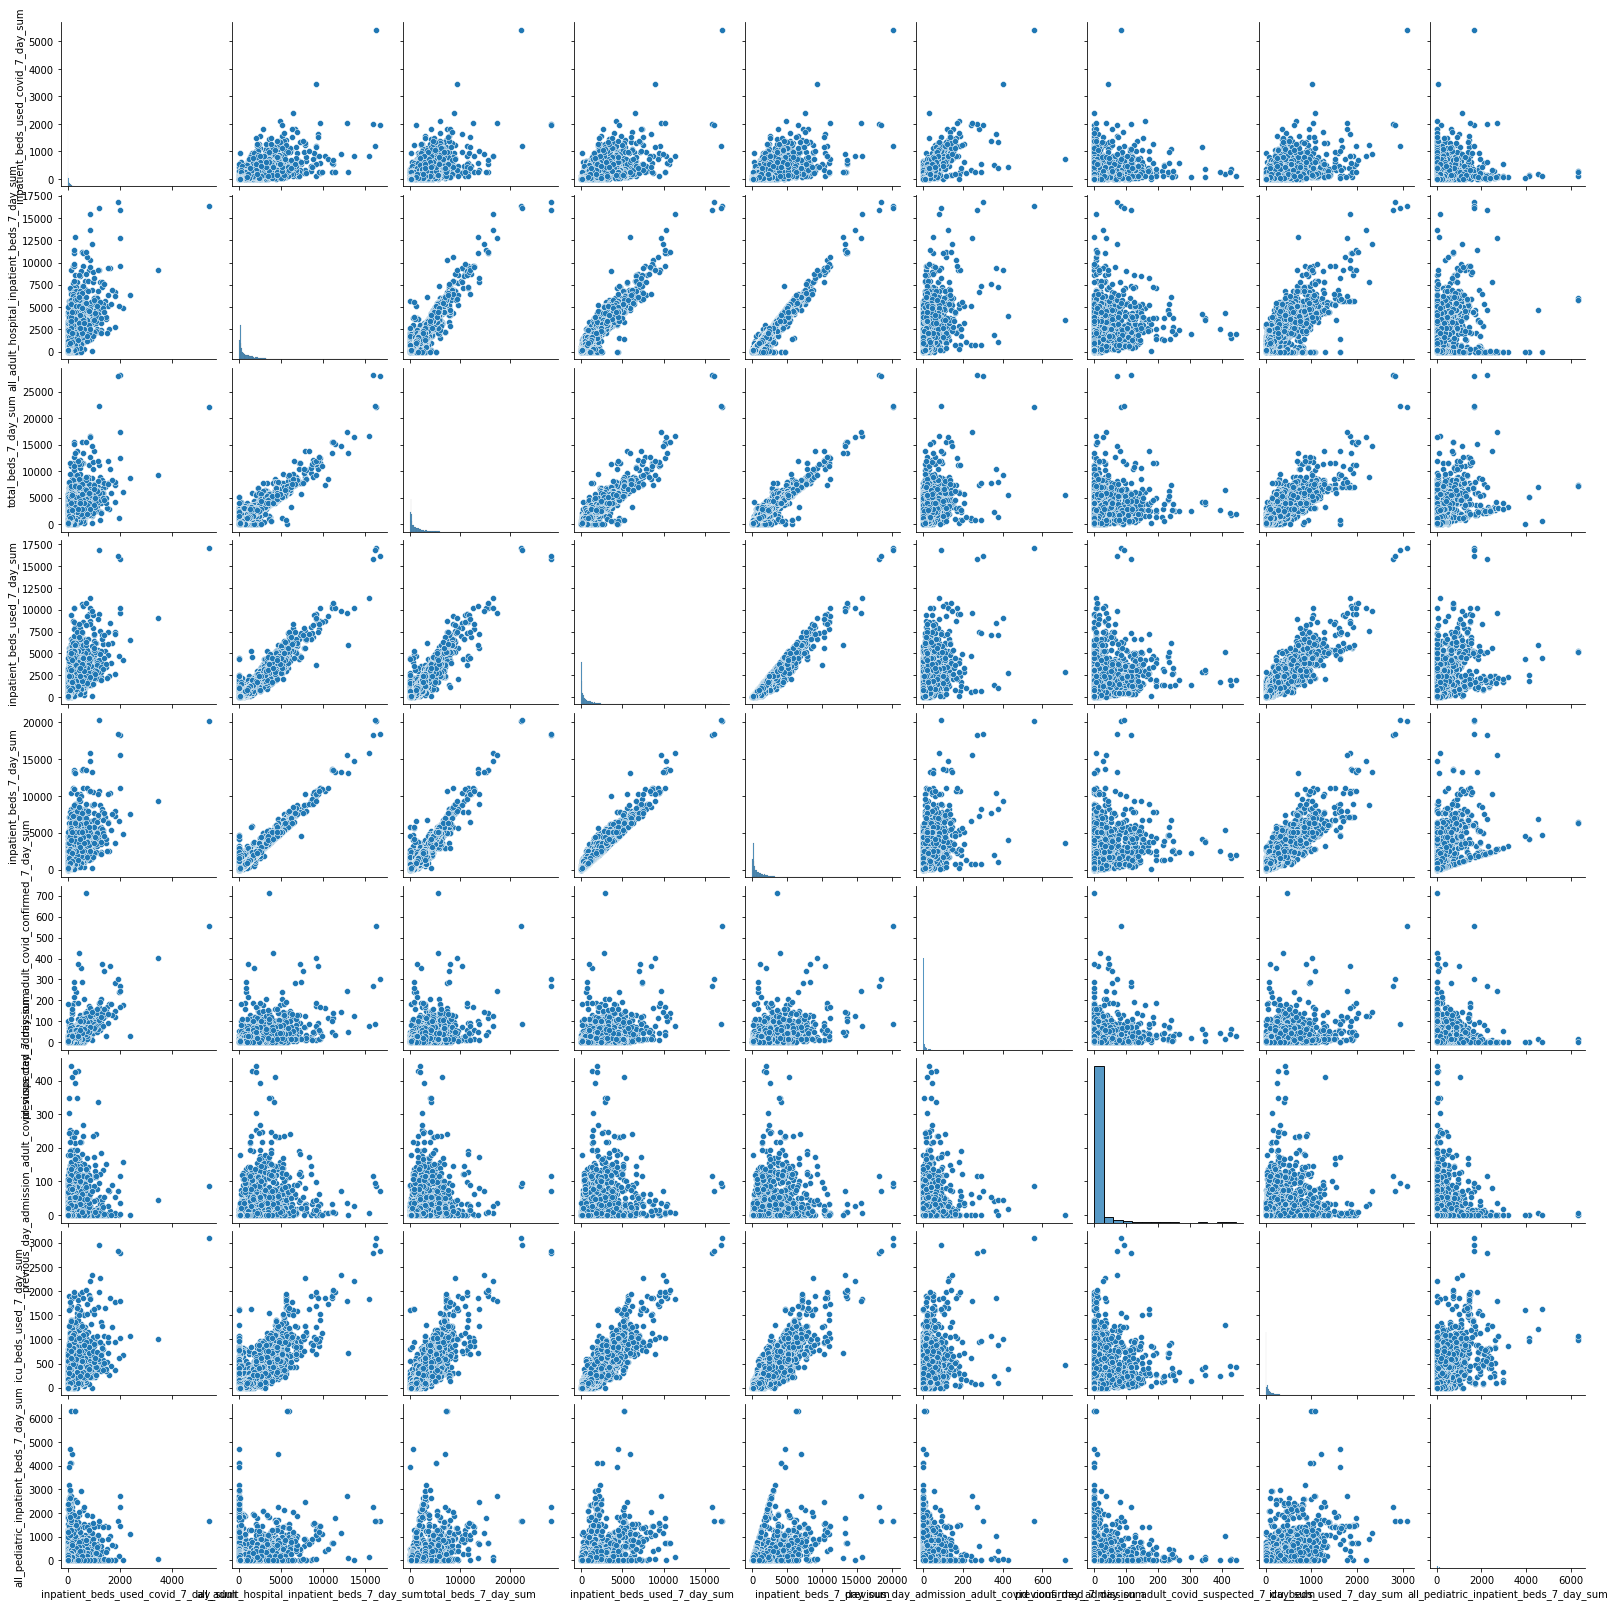

In [405]:
sns.pairplot(psliced)

Determine if there are linear correlations?

In [386]:
y = np.array(psliced['inpatient_beds_used_covid_7_day_sum'])
y

array([247.,  52.,  25., ...,   0.,   7.,  10.])

In [387]:
X_1 = np.array(psliced['total_beds_7_day_sum'])

X_2 = np.log(np.array(psliced['inpatient_beds_used_7_day_sum']))
X_3 = np.array(psliced['inpatient_beds_7_day_sum'])

X_4 = np.array(psliced['all_adult_hospital_inpatient_beds_7_day_sum'])

X_5 = np.array(psliced['previous_day_admission_adult_covid_confirmed_7_day_sum'])

# X_2 = np.log(X_2)

C:\Users\derek\AppData\Local\Temp\ipykernel_16568\2634886588.py:3: RuntimeWarning: divide by zero encountered in log
  X_2 = np.log(np.array(psliced['inpatient_beds_used_7_day_sum']))


## Logorithmic relationship between X_1 and y

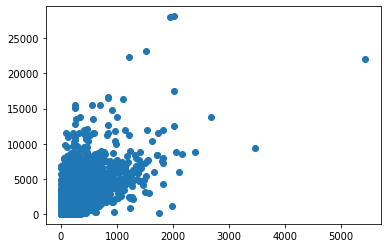

In [388]:
plt.scatter(y, X_1)

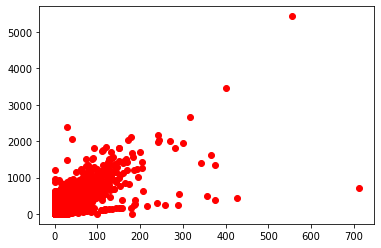

In [389]:
plt.scatter(X_5, y, color='red')

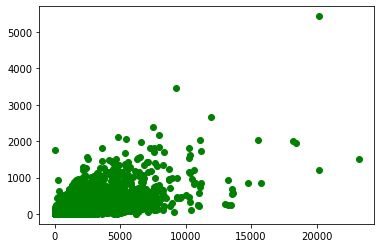

In [390]:
plt.scatter(X_3, y, color='green')

In [407]:
np.corrcoef(X_5, y)

array([[1.        , 0.79406297],
       [0.79406297, 1.        ]])

# Training Model

In [392]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [393]:
X = psliced.drop('inpatient_beds_used_covid_7_day_sum',axis=1)
X2 = psliced['previous_day_admission_adult_covid_confirmed_7_day_sum']
y = psliced['inpatient_beds_used_covid_7_day_sum']

In [394]:
X_train, X_test, y_train, y_test = train_test_split(X_5, y, test_size=0.3, random_state=404)

In [395]:
y_train.shape

(10701,)

In [396]:
lm = LinearRegression()
X_train = np.array(X_train)
lm.fit(X_train.reshape(-1, 1), y_train)


LinearRegression()

In [397]:
predictions = lm.predict(X_test.reshape(-1, 1))

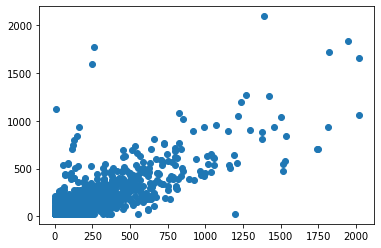

In [398]:
plt.scatter(y_test,predictions)

In [406]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
metrics.r2_score(y_test, predictions)

MAE: 48.431934776609914
MSE: 10396.59716072846
RMSE: 101.96370511475375


0.670743834905041

## NOTE: using avg has less clustering effect than sum!